In [35]:
import pandas as pd
import numpy as np
import csv
import xlrd
import openpyxl
from pathlib import Path
import datetime
import seaborn as sns
import mpld3
import matplotlib.pyplot as plt
from mpld3 import plugins

In [36]:
#This is the data already cleaned in Step A. The full year table transaction data and unpivoted account data
acc_df = pd.read_excel('Clean_Data.xlsx', sheet_name= 'Account')
trans_df = pd.read_excel('Clean_Data.xlsx', sheet_name = 'Transactions')

In [37]:
trans_df

,month,category,group,flow,actual,budget,monthnum,diff
0,Apr,Alcohol,Leisure,Out,-86.08,-50.0,4,36.08
1,Apr,BB Income,Income,In,20.00,100.0,4,-80.00
2,Apr,Car,Leisure,Out,-203.94,-450.0,4,-246.06
3,Apr,Cellphone,Housing,Out,-168.68,-50.0,4,118.68
4,Apr,Clothes,Living,Out,-204.54,-200.0,4,4.54
...,...,...,...,...,...,...,...,...
212,Jul,Public Transportation,Leisure,Out,0.00,-20.0,7,-20.00
213,Jul,Special Splurge,Leisure,Out,0.00,0.0,7,0.00
214,Jul,Income Taxes,Living,Out,0.00,0.0,7,0.00
215,Jul,Viv's Choice,Leisure,Out,0.00,-70.0,7,-70.00


In [38]:
trans_df['month'] = trans_df.apply(lambda x: str(x['monthnum']).zfill(2) + " - " + x['month'],axis = 1)

In [39]:
trans_df

,month,category,group,flow,actual,budget,monthnum,diff
0,04 - Apr,Alcohol,Leisure,Out,-86.08,-50.0,4,36.08
1,04 - Apr,BB Income,Income,In,20.00,100.0,4,-80.00
2,04 - Apr,Car,Leisure,Out,-203.94,-450.0,4,-246.06
3,04 - Apr,Cellphone,Housing,Out,-168.68,-50.0,4,118.68
4,04 - Apr,Clothes,Living,Out,-204.54,-200.0,4,4.54
...,...,...,...,...,...,...,...,...
212,07 - Jul,Public Transportation,Leisure,Out,0.00,-20.0,7,-20.00
213,07 - Jul,Special Splurge,Leisure,Out,0.00,0.0,7,0.00
214,07 - Jul,Income Taxes,Living,Out,0.00,0.0,7,0.00
215,07 - Jul,Viv's Choice,Leisure,Out,0.00,-70.0,7,-70.00


In [40]:
trans_cat_df = trans_df.groupby(['month','flow','category']).agg({'actual' : lambda act: sum(act),'budget' : lambda bud: sum(bud),'diff' : lambda diff: sum(diff)})
trans_cat_lut = trans_cat_df.to_dict()
trans_cat_lut

{'actual': {('01 - Jan', 'In', 'BB Income'): 0.0,
  ('01 - Jan', 'In', 'Interest Income'): 0.06,
  ('01 - Jan', 'In', 'Other Income'): 23.36,
  ('01 - Jan', 'In', "Timmy's Cheque"): 3708.5,
  ('01 - Jan', 'In', "Viv's Cheque"): 1847.47,
  ('01 - Jan', 'Out', 'Alcohol'): -54.88,
  ('01 - Jan', 'Out', 'Car'): -233.23,
  ('01 - Jan', 'Out', 'Cellphone'): -116.86,
  ('01 - Jan', 'Out', 'Clothes'): -93.36,
  ('01 - Jan', 'Out', 'Eating Out'): -54.19,
  ('01 - Jan', 'Out', 'Fees'): -0.009999999999999787,
  ('01 - Jan', 'Out', 'Food & Supplies'): -786.69,
  ('01 - Jan', 'Out', 'Fun & Dates'): -0.01,
  ('01 - Jan', 'Out', 'Gifts'): -89.26,
  ('01 - Jan', 'Out', 'God'): -220.95,
  ('01 - Jan', 'Out', 'Health'): -24.09,
  ('01 - Jan', 'Out', 'Hobbies'): -69.59,
  ('01 - Jan', 'Out', 'Home Improvement'): -0.01,
  ('01 - Jan', 'Out', 'Income Taxes'): 0.0,
  ('01 - Jan', 'Out', 'Public Transportation'): -0.01,
  ('01 - Jan', 'Out', 'Rent & Utilities'): -800.01,
  ('01 - Jan', 'Out', 'Saving'): 17.1

In [41]:
trans_cat_lut['diff']['04 - Apr','In',"Timmy's Cheque"]

59.23999999999978

In [42]:
trans_cat_df

actual   budget    diff
month    flow     category                                     
01 - Jan In       BB Income               0.00     0.00    0.00
                  Interest Income         0.06     0.00    0.06
                  Other Income           23.36    10.00   13.36
                  Timmy's Cheque       3708.50  3258.00  450.50
                  Viv's Cheque         1847.47  2486.25 -638.78
...                                        ...      ...     ...
07 - Jul Out      Travel                -35.34  -250.00 -214.66
                  Viv's Choice            0.00   -70.00  -70.00
                  Vivian Work Expense  -647.23  -100.00  547.23
         Transfer Pay Credit Card       118.52     0.00    0.00
                  Transfer                0.00     0.00    0.00

[217 rows x 3 columns]

In [60]:
jan_trans = trans_df[trans_df['month'] == '01 - Jan']
jan_trans

,month,category,group,flow,actual,budget,monthnum,diff
47,01 - Jan,Alcohol,Leisure,Out,-54.88,-50.000,1,4.880
48,01 - Jan,Car,Leisure,Out,-233.23,-450.000,1,-216.770
49,01 - Jan,Cellphone,Housing,Out,-116.86,-85.000,1,31.860
50,01 - Jan,Clothes,Living,Out,-93.36,-150.000,1,-56.640
51,01 - Jan,Pay Credit Card,Transfer,Transfer,-0.01,0.000,1,0.000
52,01 - Jan,Eating Out,Leisure,Out,-54.19,-70.000,1,-15.810
53,01 - Jan,Fees,Living,Out,-0.01,0.000,1,0.010
54,01 - Jan,Fun & Dates,Leisure,Out,-0.01,-110.000,1,-109.990
55,01 - Jan,Gifts,Giving,Out,-89.26,-150.000,1,-60.740
56,01 - Jan,God,Giving,Out,-220.95,-575.425,1,-354.475


In [117]:
jan_out = jan_trans[jan_trans['flow'] == "Out"]
jan_in = jan_trans[jan_trans['flow'] == "In"]

,category,actual,budget,diff
47,Alcohol,-54.88,-50.000,4.880
48,Car,-233.23,-450.000,-216.770
49,Cellphone,-116.86,-85.000,31.860
50,Clothes,-93.36,-150.000,-56.640
52,Eating Out,-54.19,-70.000,-15.810
53,Fees,-0.01,0.000,0.010
57,Food & Supplies,-786.69,-550.000,236.690
54,Fun & Dates,-0.01,-110.000,-109.990
55,Gifts,-89.26,-150.000,-60.740
56,God,-220.95,-575.425,-354.475


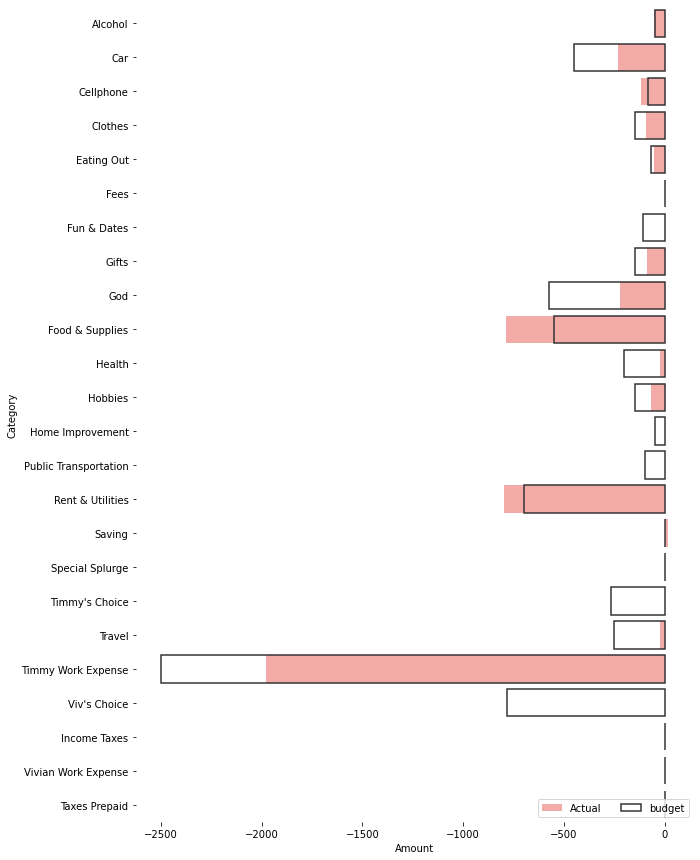

In [116]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 15))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="actual", y="category", data=jan_out,
            label="Actual", color="r")

# Plot the crashes where alcohol was involved
sns.barplot(x="budget", y="category", data=jan_out,
            label="budget", linewidth=1.5, facecolor=(1, 1, 1, 0),
            errcolor=".2", edgecolor=".2")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Category",
       xlabel="Amount")
sns.despine(left=True, bottom=True)

jan_out.drop(columns = ['month','group','flow','monthnum']).sort_values(by = 'category')
# for i, row in jan_trans.iterrows():
#     ax.text(row.actual,i, row.diff, color='black', ha="center")

In [98]:
for i, row in jan_trans.iterrows():
    print(i)
    if i == 47:
        print(row)
    print(row.category)

47
month       01 - Jan
category     Alcohol
group        Leisure
flow             Out
actual        -54.88
budget           -50
monthnum           1
diff            4.88
Name: 47, dtype: object
Alcohol
48
Car
49
Cellphone
50
Clothes
51
Pay Credit Card
52
Eating Out
53
Fees
54
Fun & Dates
55
Gifts
56
God
57
Food & Supplies
58
Health
59
Hobbies
60
Home Improvement
61
Interest Income
62
Other Income
63
Public Transportation
64
Rent & Utilities
65
Saving
66
Special Splurge
67
Timmy's Cheque
68
Timmy's Choice
69
Transfer
70
Travel
71
Timmy Work Expense
72
Viv's Cheque
73
Viv's Choice
164
BB Income
165
Income Taxes
166
Vivian Work Expense
167
Taxes Prepaid


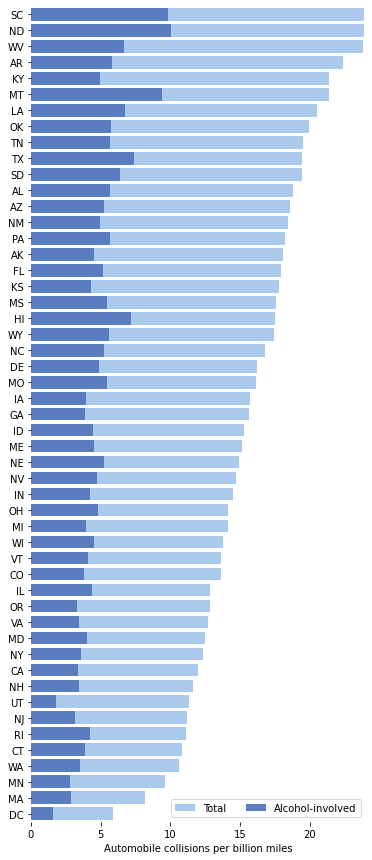

In [54]:

# sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

In [45]:
crashes

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
17,21.4,4.066,4.922,16.692,16.264,872.51,137.13,KY
26,21.4,8.346,9.416,17.976,18.190,816.21,85.15,MT
18,20.5,7.175,6.765,14.965,20.090,1281.55,194.78,LA
36,19.9,6.368,5.771,18.308,18.706,881.51,178.86,OK
42,19.5,4.095,5.655,15.990,15.795,767.91,155.57,TN
43,19.4,7.760,7.372,17.654,16.878,1004.75,156.83,TX


In [72]:
jan_trans.head()

,month,category,group,flow,actual,budget,monthnum,diff
47,01 - Jan,Alcohol,Leisure,Out,-54.88,-50.0,1,4.88
48,01 - Jan,Car,Leisure,Out,-233.23,-450.0,1,-216.77
49,01 - Jan,Cellphone,Housing,Out,-116.86,-85.0,1,31.86
50,01 - Jan,Clothes,Living,Out,-93.36,-150.0,1,-56.64
51,01 - Jan,Pay Credit Card,Transfer,Transfer,-0.01,0.0,1,0.00


In [81]:
jan_trans_melt = jan_trans.melt(id_vars = ['month','category','group','flow','monthnum'], var_name = 'Type', value_name = 'Amount')
# df_unpivoted = df.melt(id_vars=['car_model'], var_name='date', value_name='0-60mph_in_seconds')